**clustering_Global_Development**

**Importing necessary libraries**

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import missingno as msno

In [46]:
# --- Load Data ---
df = pd.read_excel("/content/World_development_mesurement.xlsx")

In [47]:
print(df.columns)

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [49]:
print(df.describe())

        Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       2

In [50]:
# --- Drop unwanted column ---
df = df.drop(columns=['Number of Records'], errors="ignore")

In [51]:
# --- Encode Country ---
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
df['Country_encoded'] = df['Country_encoded'].astype(float)
df.drop(['Country'], axis=1, inplace=True)

In [52]:
df['Country_encoded']

,Country_encoded
0,2.0
1,5.0
2,20.0
3,25.0
4,29.0
...,...
2699,193.0
2700,198.0
2701,199.0
2702,202.0


In [53]:
# --- Clean symbols ---
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(r"[\$,%]", "", regex=True)
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [54]:
## check missising values
print("{} missing values present in whole data.".format(df.isnull().sum().sum()))

11740 missing values present in whole data.


**Missing Value Analysis**

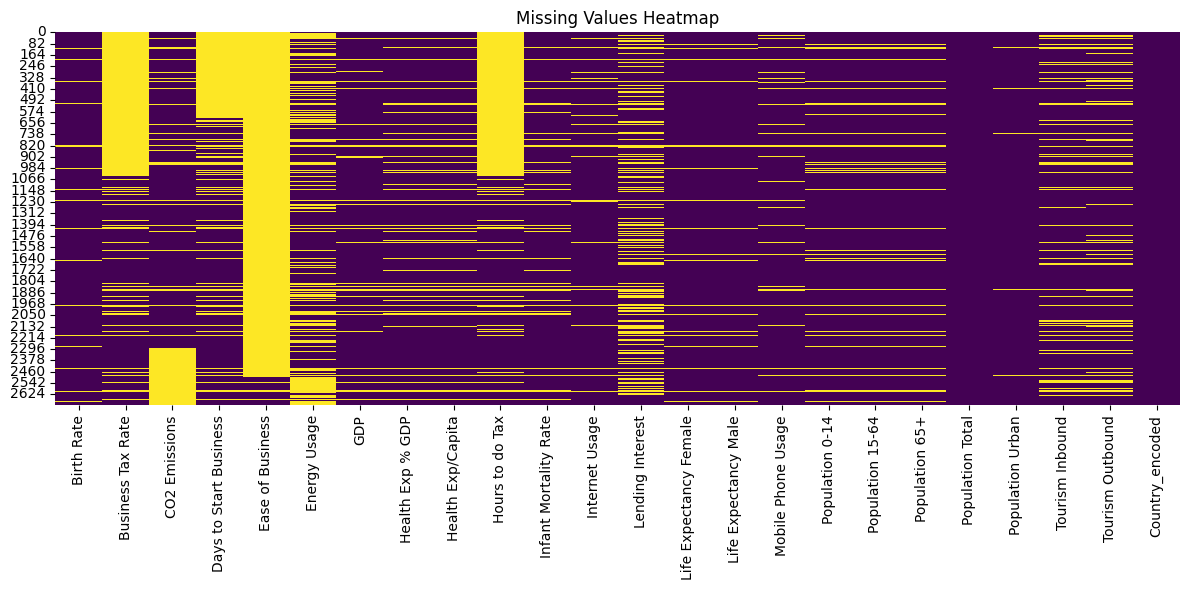

In [55]:

import matplotlib.pyplot as plt
import seaborn as sns
def plot_missingness(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.tight_layout()
    plt.show()

plot_missingness(df)

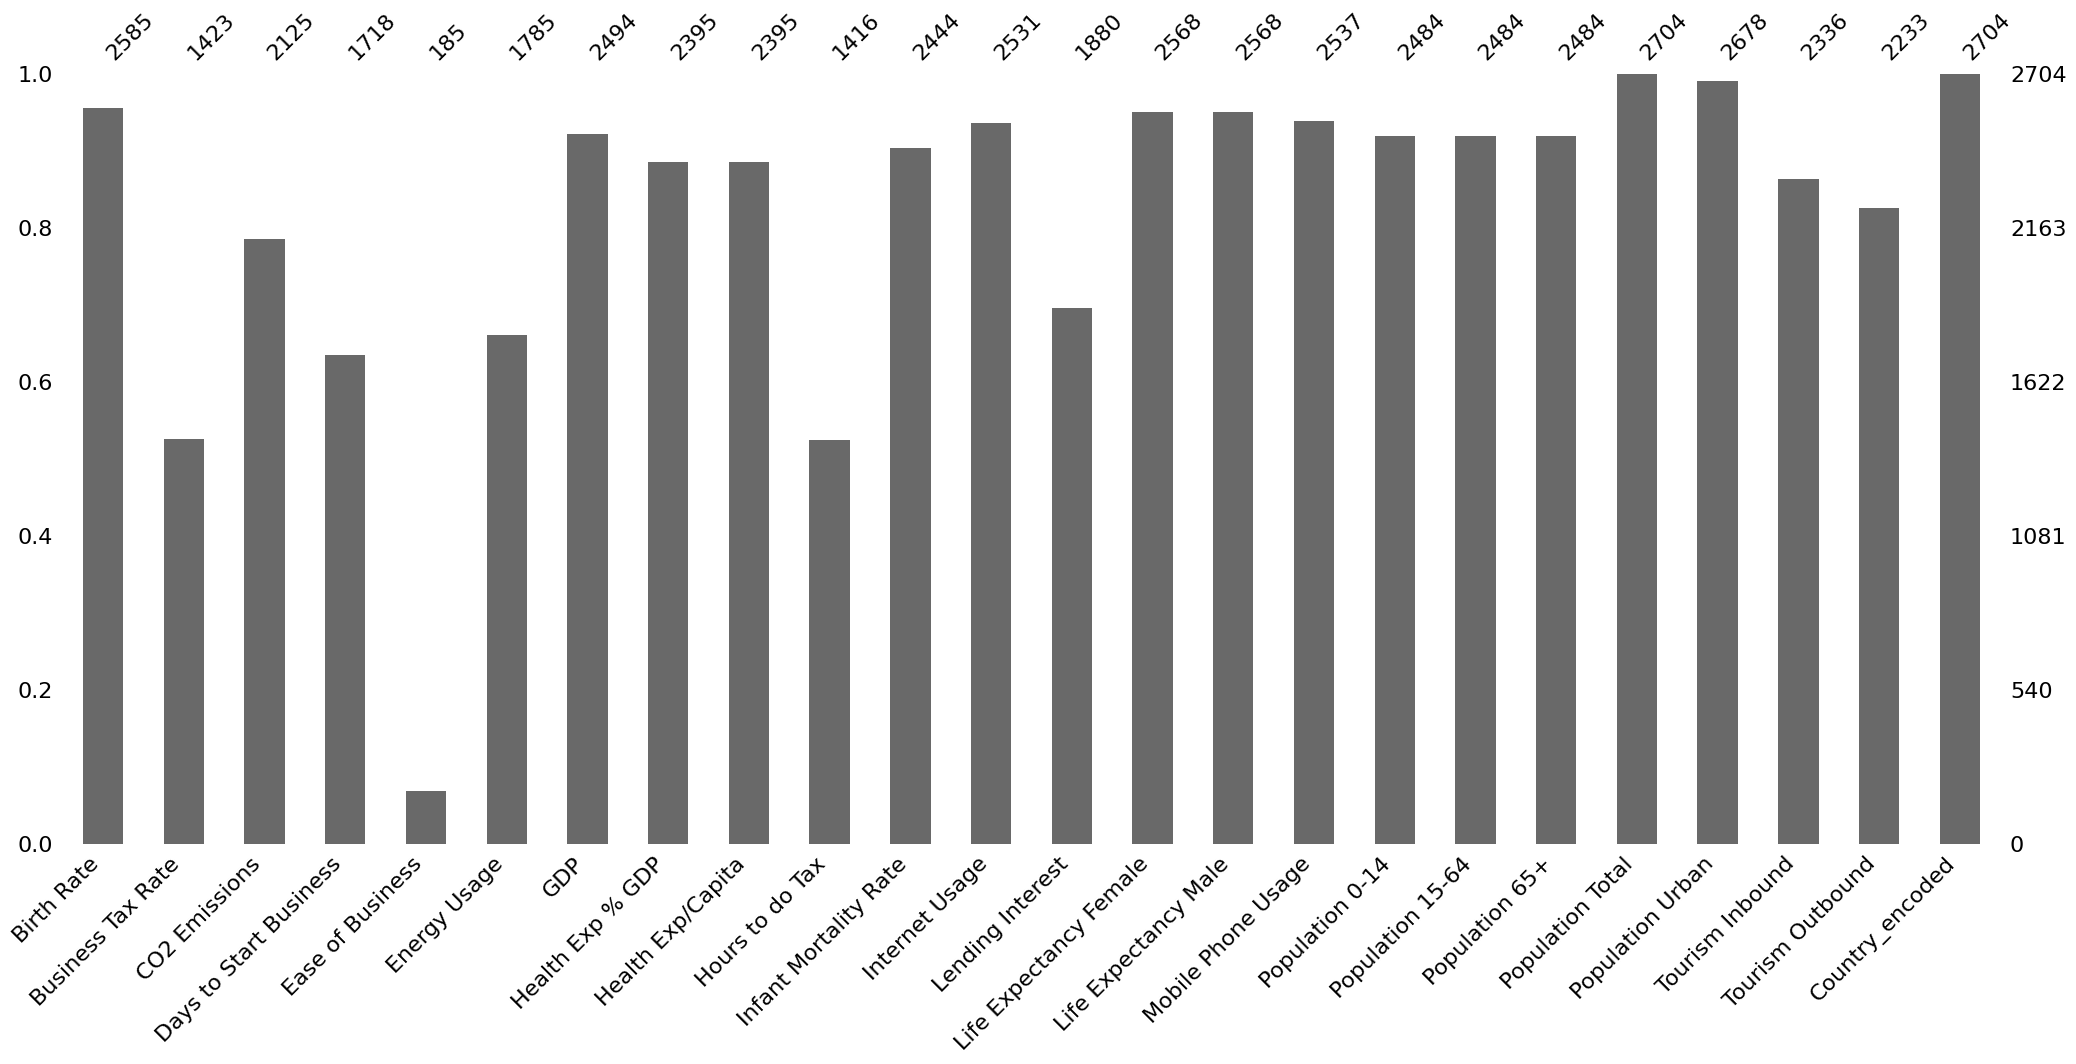

In [56]:
import missingno as msno
msno.bar(df)
plt.show()## visualize missing value for each artibute


**Impute Missing Values**

In [57]:

num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()

if num_cols:
    df[num_cols] = SimpleImputer(strategy="median").fit_transform(df[num_cols])
if cat_cols:
    cat_cols = [col for col in cat_cols if not df[col].isnull().all()]
    df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])

print("Missing values imputed.")
print(df.isnull().sum())

Missing values imputed.
Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
Country_encoded           0
dtype: int64


**Visualizations**

**Histplot**

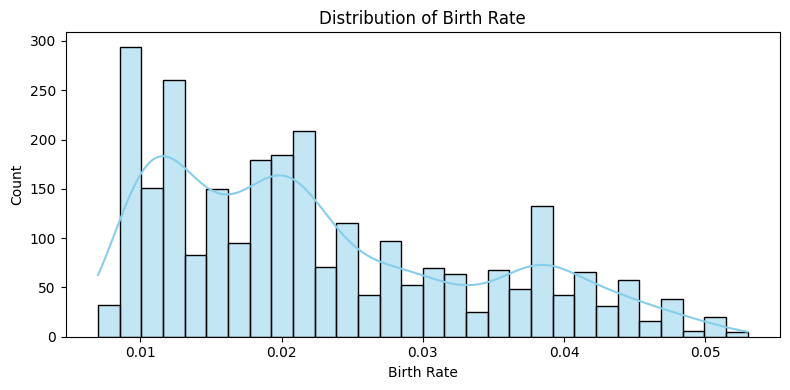

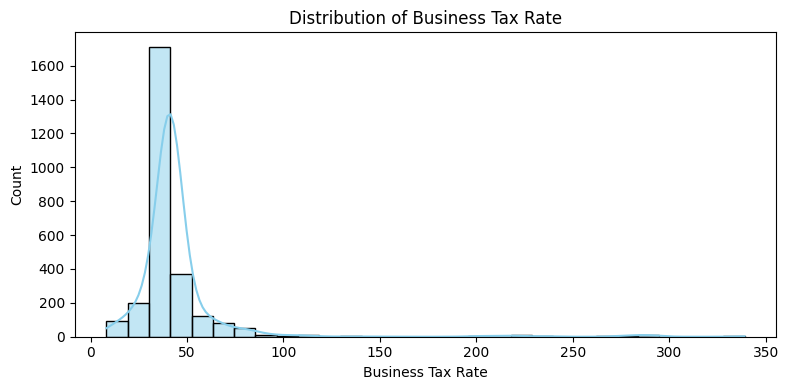

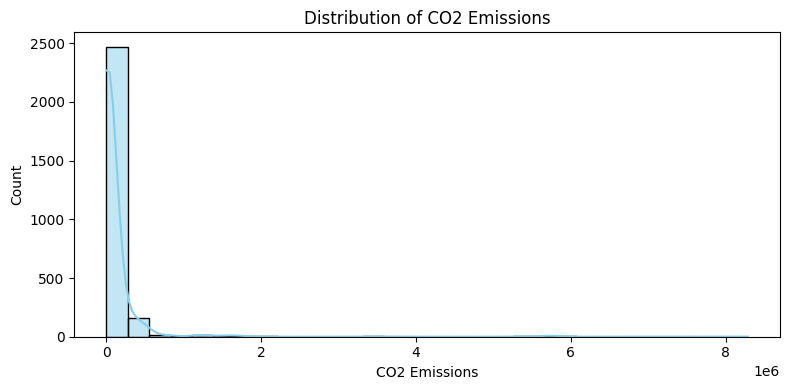

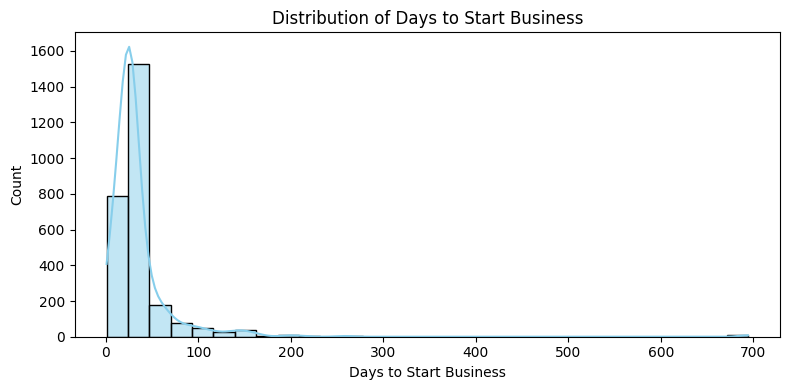

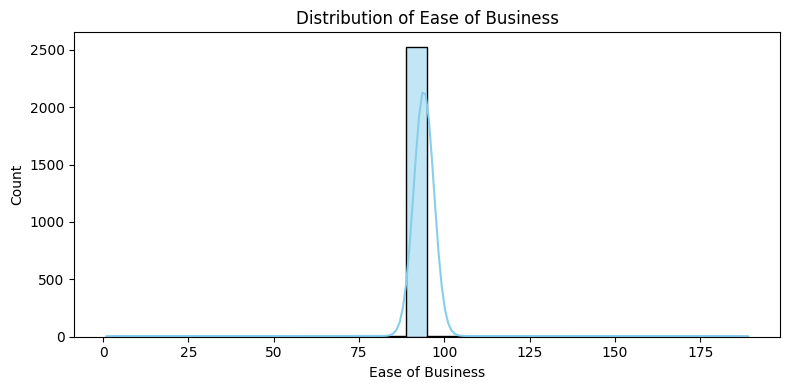

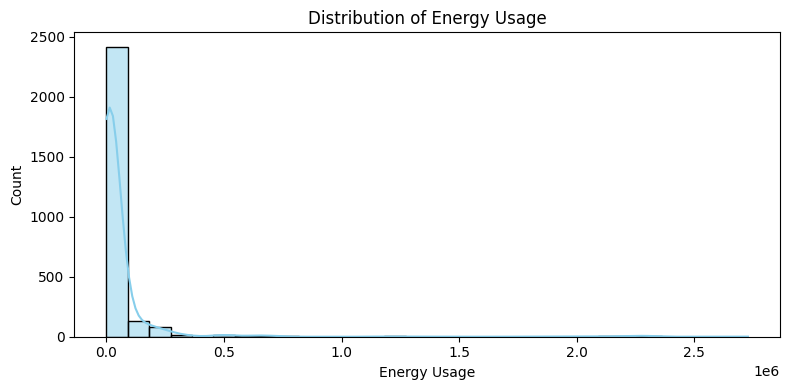

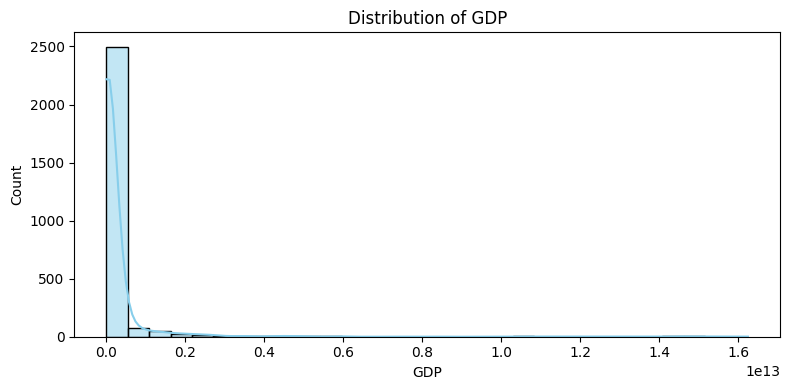

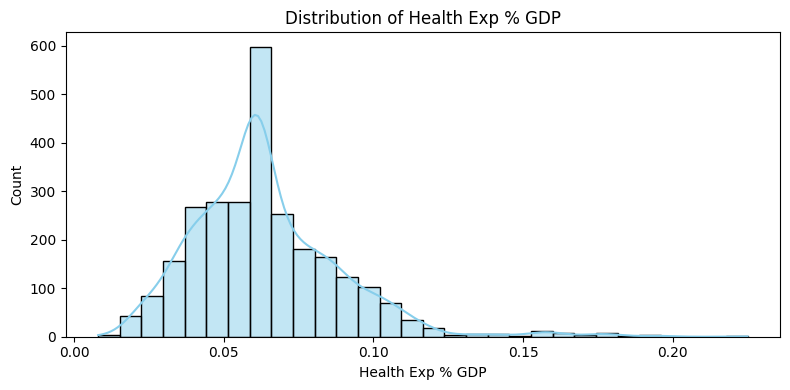

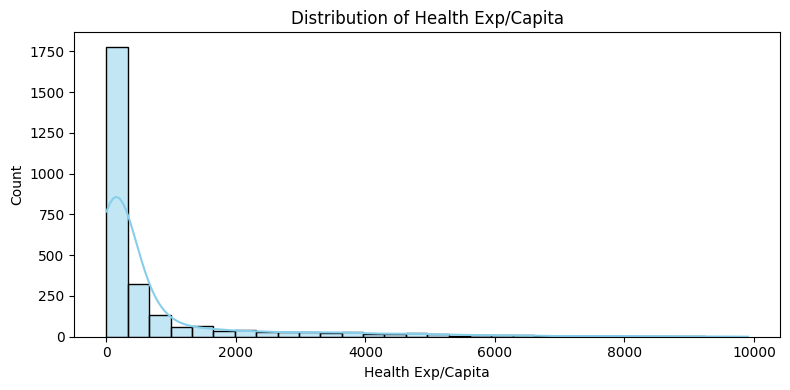

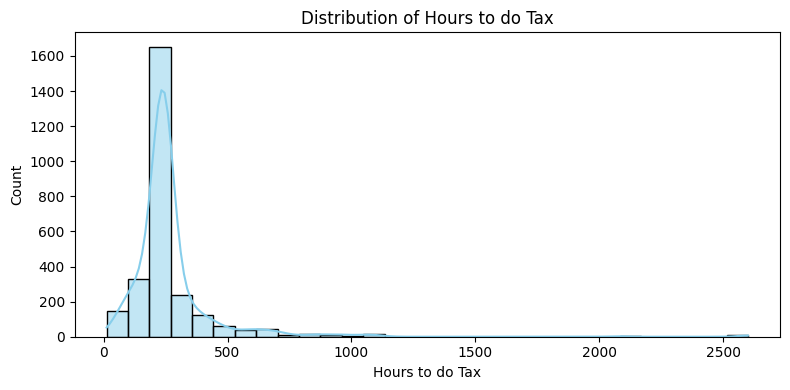

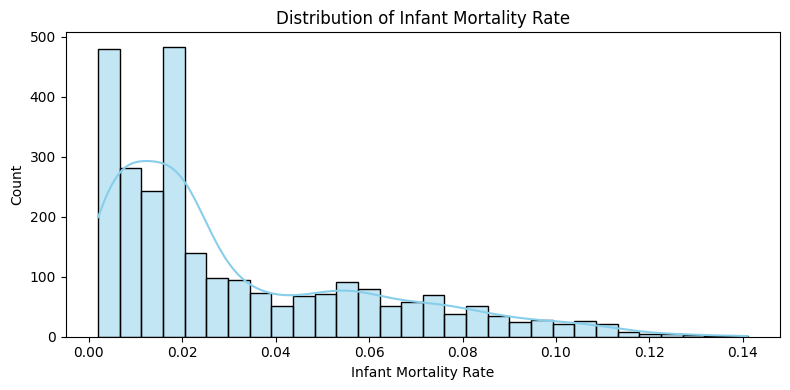

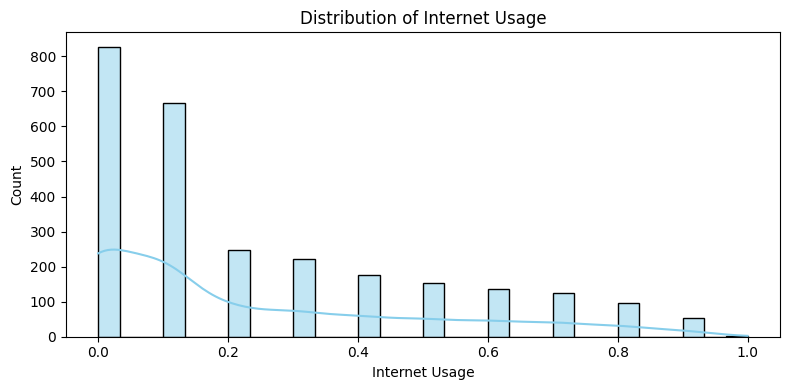

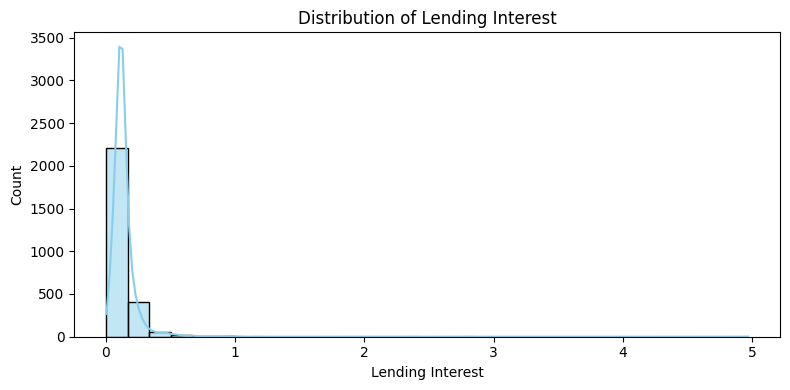

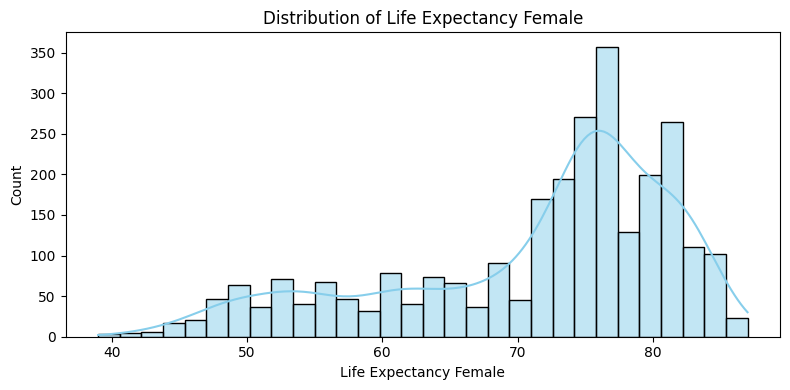

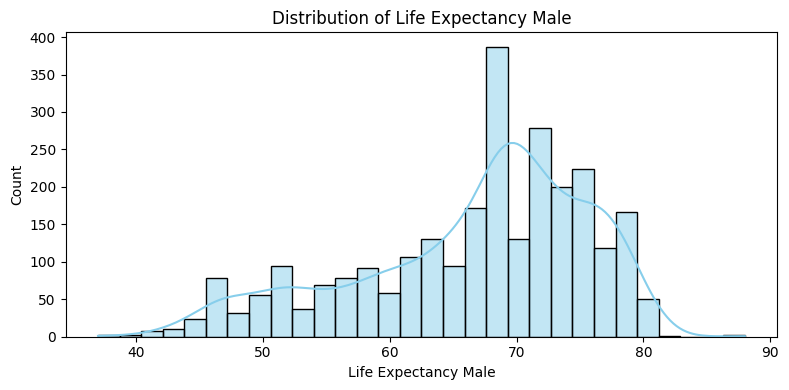

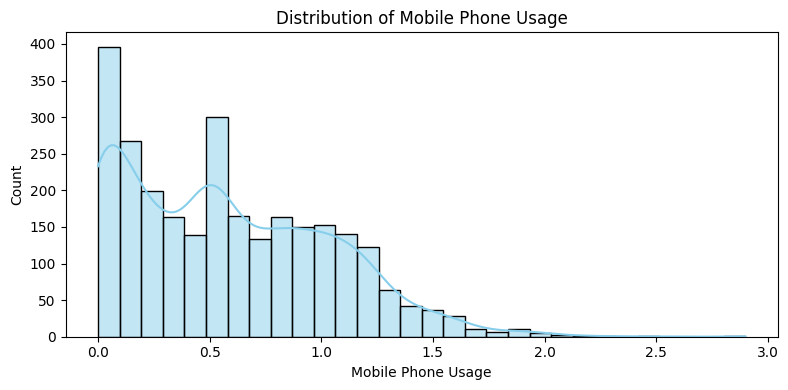

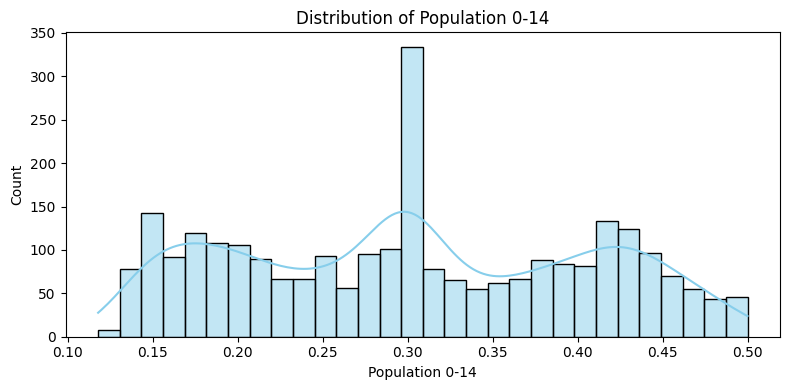

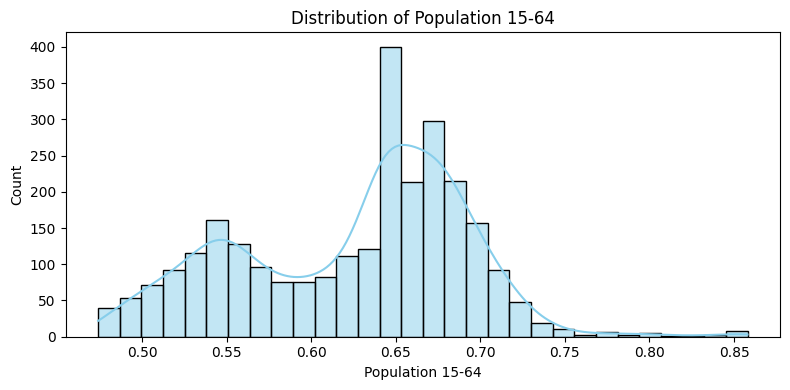

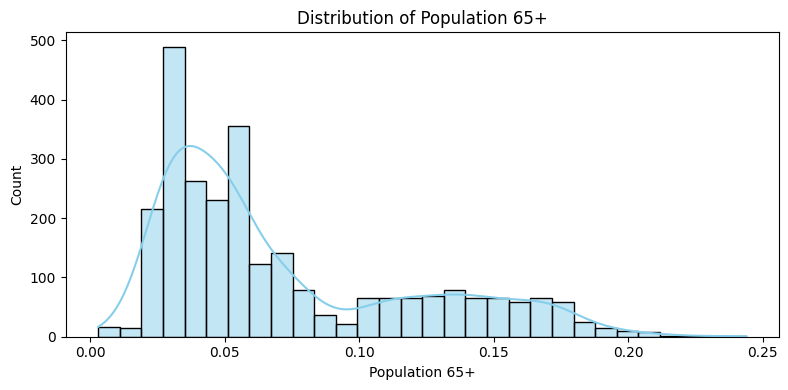

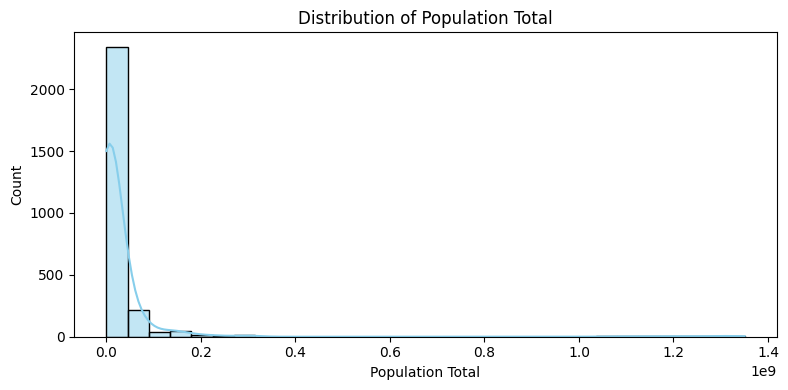

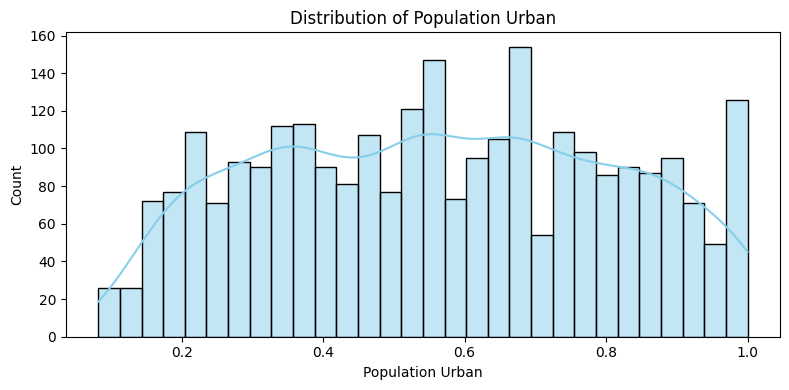

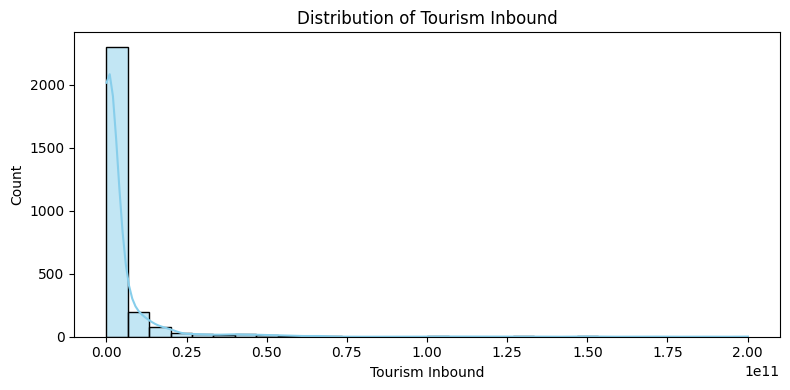

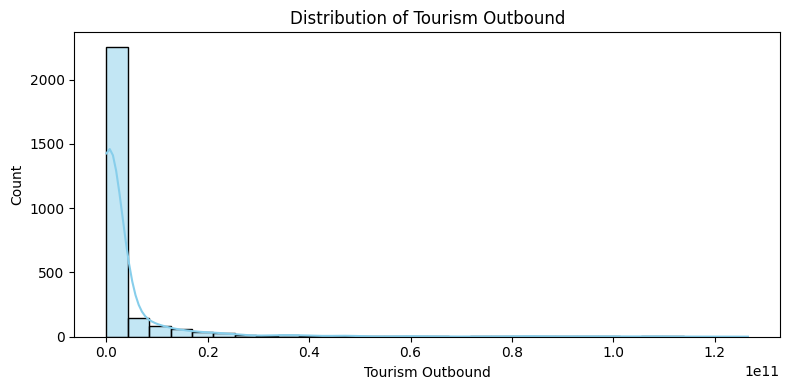

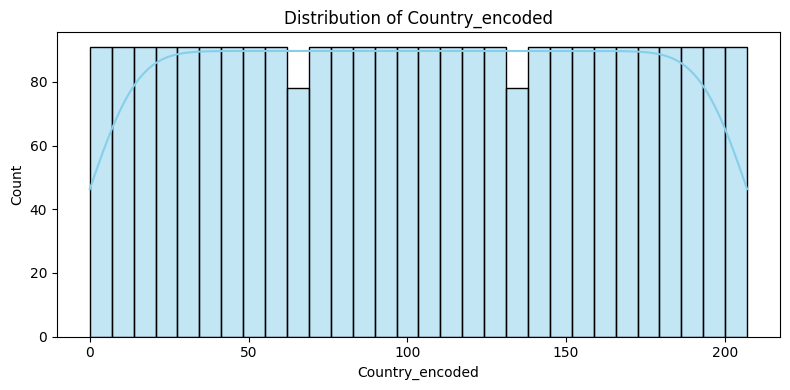

In [58]:

def plot_histograms(df, cols):
    for col in cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

plot_histograms(df, num_cols)

**Correlation Matrix**

In [59]:
df[num_cols].corr()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
Birth Rate,1.000000,0.210435,-0.148665,0.142392,0.180195,-0.159230,-0.184839,-0.203536,-0.411804,0.055880,...,-0.821947,-0.536971,0.941822,-0.906371,-0.737706,-0.054973,-0.592360,-0.270296,-0.275113,0.038013
Business Tax Rate,0.210435,1.000000,0.025192,0.022330,0.088081,0.027167,0.016925,0.044159,-0.073806,0.157252,...,-0.220166,-0.106278,0.158522,-0.188364,-0.073951,0.053004,-0.093333,0.000344,-0.004125,-0.124027
CO2 Emissions,-0.148665,0.025192,1.000000,-0.027550,-0.000803,0.908944,0.693480,0.144582,0.207046,0.066940,...,0.112328,0.016765,-0.169931,0.158759,0.142830,0.655298,0.073803,0.591023,0.561877,0.031849
Days to Start Business,0.142392,0.022330,-0.027550,1.000000,0.097315,-0.037432,-0.058190,-0.101871,-0.142882,0.151162,...,-0.172542,-0.111373,0.163997,-0.136081,-0.157461,0.011373,-0.083134,-0.095646,-0.091924,0.024691
Ease of Business,0.180195,0.088081,-0.000803,0.097315,1.000000,-0.044719,-0.079834,-0.077499,-0.182809,0.109115,...,-0.173482,-0.128599,0.199902,-0.169690,-0.189318,0.008708,-0.123747,-0.126441,-0.118350,-0.024456
Energy Usage,-0.159230,0.027167,0.908944,-0.037432,-0.044719,1.000000,0.852598,0.204383,0.283808,0.069807,...,0.127748,0.044601,-0.187804,0.162603,0.175438,0.653808,0.093780,0.738068,0.696566,0.047410
GDP,-0.184839,0.016925,0.693480,-0.058190,-0.079834,0.852598,1.000000,0.330315,0.451191,0.040062,...,0.195792,0.128016,-0.228162,0.150629,0.278436,0.381322,0.164949,0.880682,0.858337,0.069564
Health Exp % GDP,-0.203536,0.044159,0.144582,-0.101871,-0.077499,0.204383,0.330315,1.000000,0.445972,-0.040249,...,0.193580,0.163672,-0.262464,0.081764,0.445454,-0.050497,0.178169,0.368690,0.353248,0.026781
Health Exp/Capita,-0.411804,-0.073806,0.207046,-0.142882,-0.182809,0.283808,0.451191,0.445972,1.000000,-0.153628,...,0.477241,0.418276,-0.478777,0.320361,0.573116,0.005577,0.438859,0.524197,0.553759,0.013082
Hours to do Tax,0.055880,0.157252,0.066940,0.151162,0.109115,0.069807,0.040062,-0.040249,-0.153628,1.000000,...,-0.108671,-0.005034,0.048673,-0.059124,-0.019068,0.123811,-0.003348,-0.035452,-0.016411,-0.094304


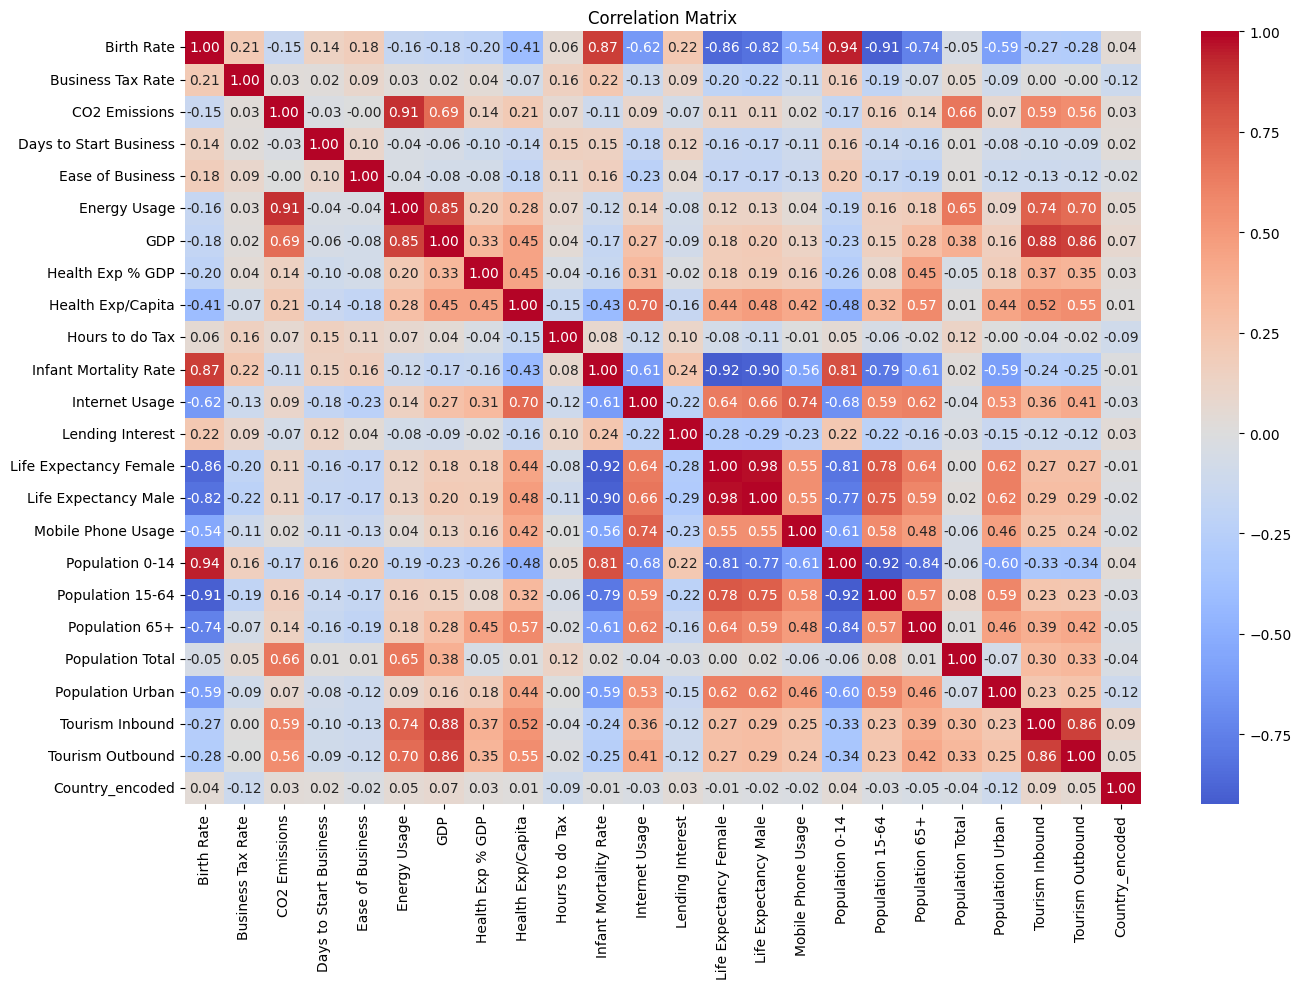

In [60]:
def plot_correlation(df):
    corr = df[num_cols].corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()
plot_correlation(df)

**Boxplot**

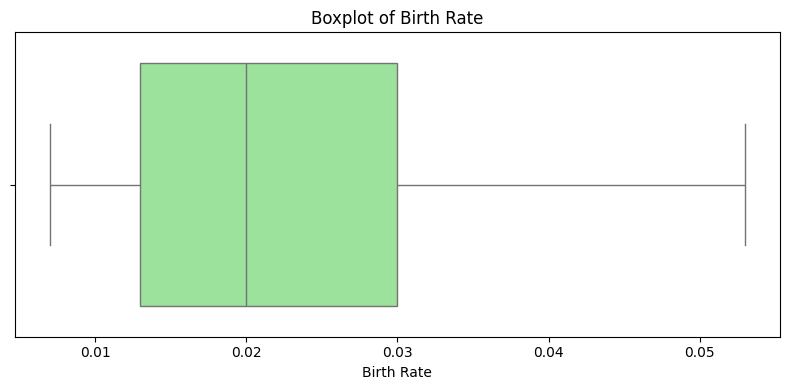

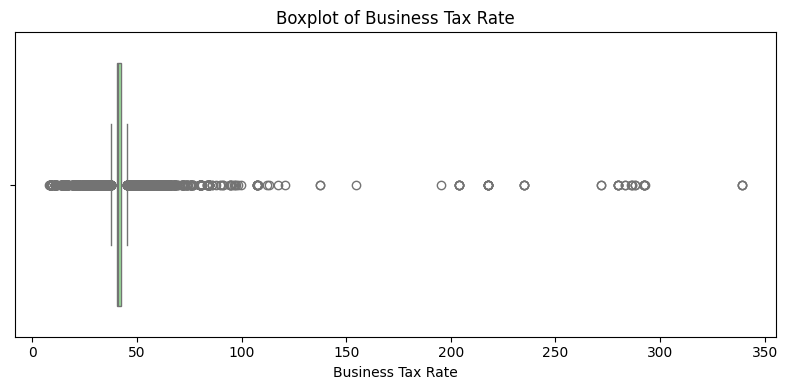

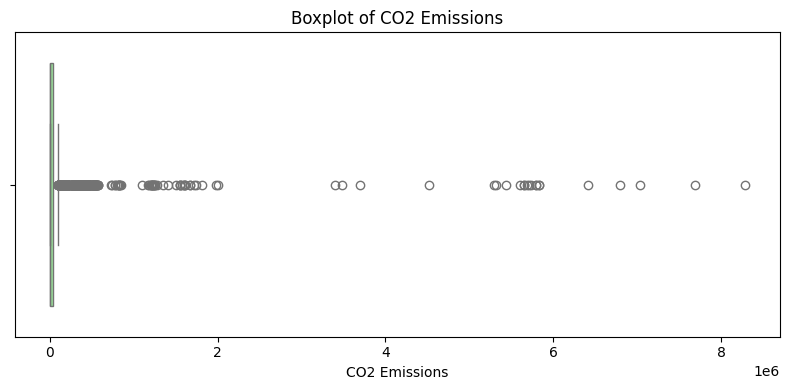

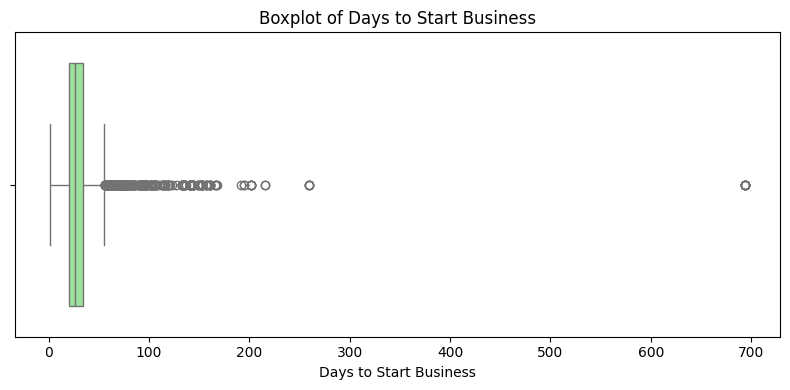

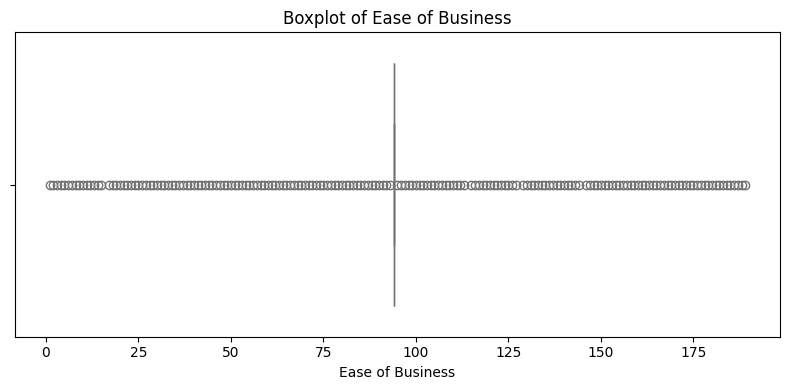

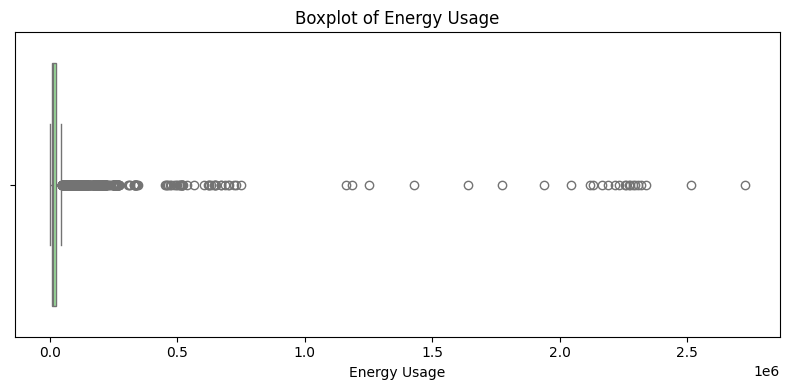

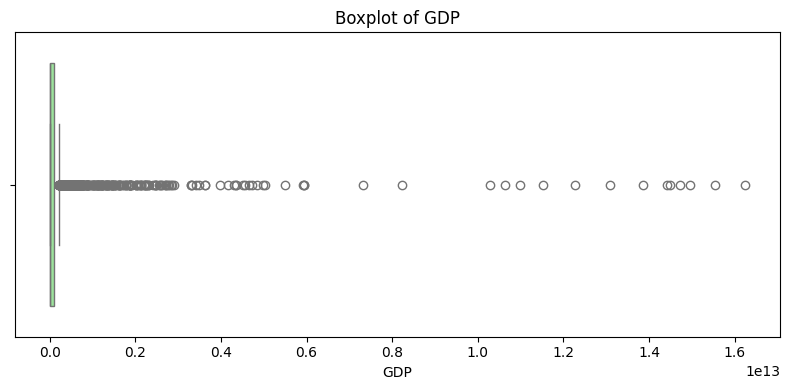

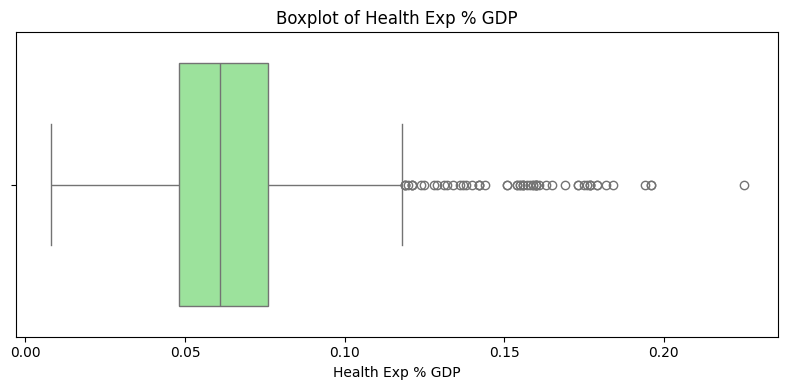

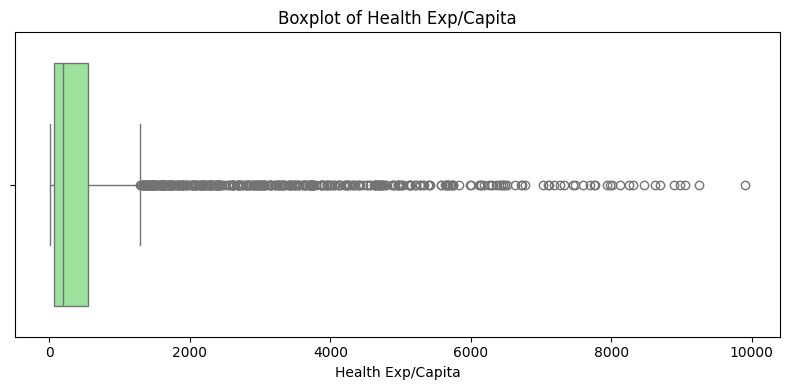

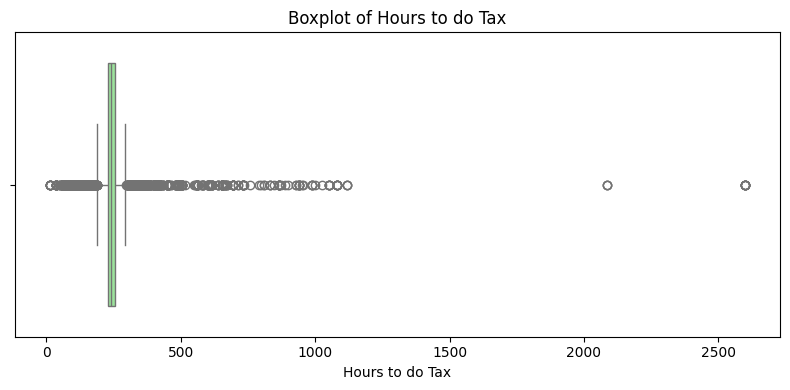

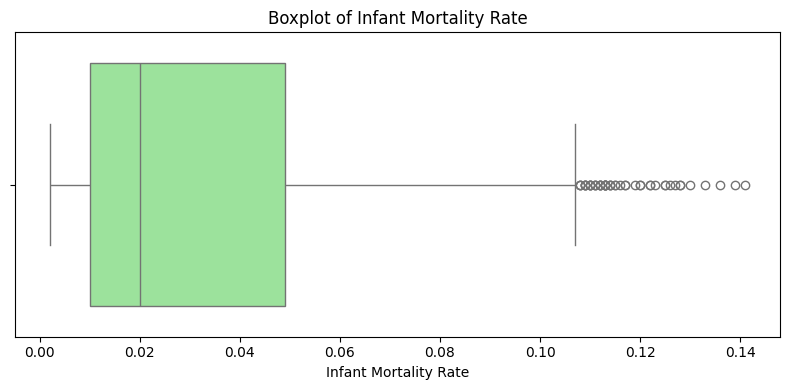

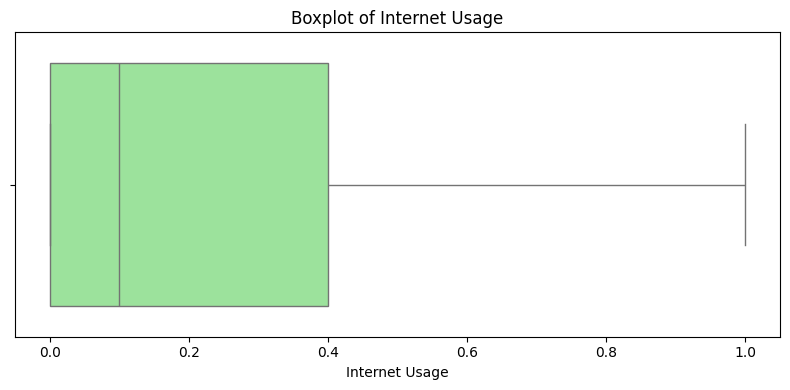

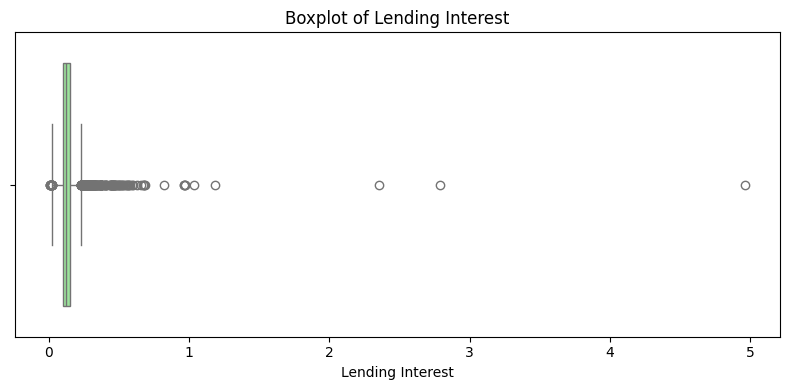

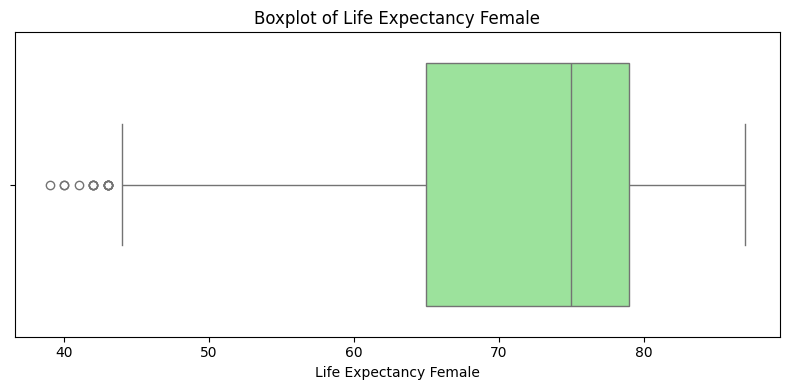

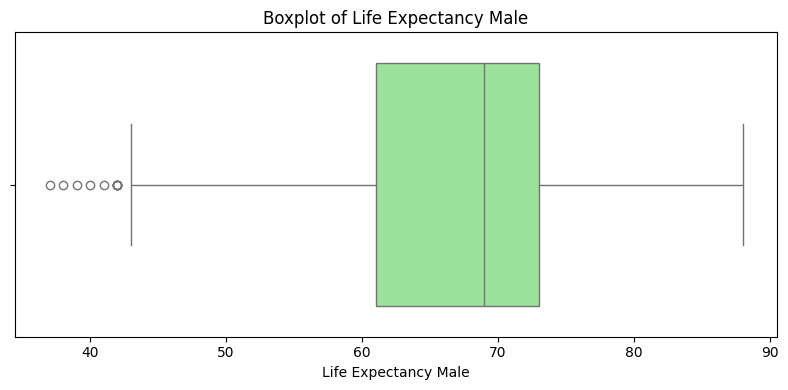

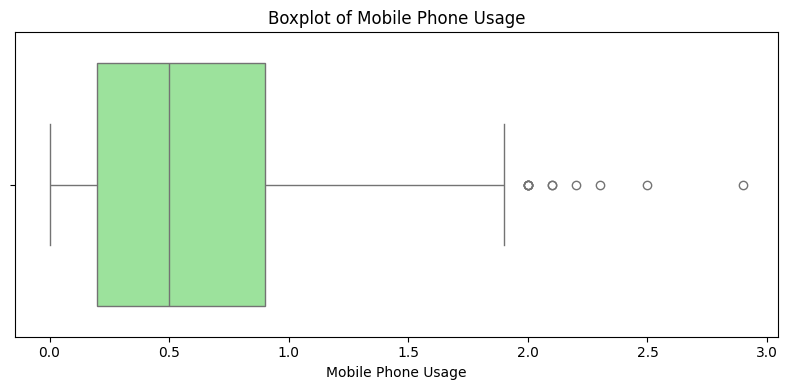

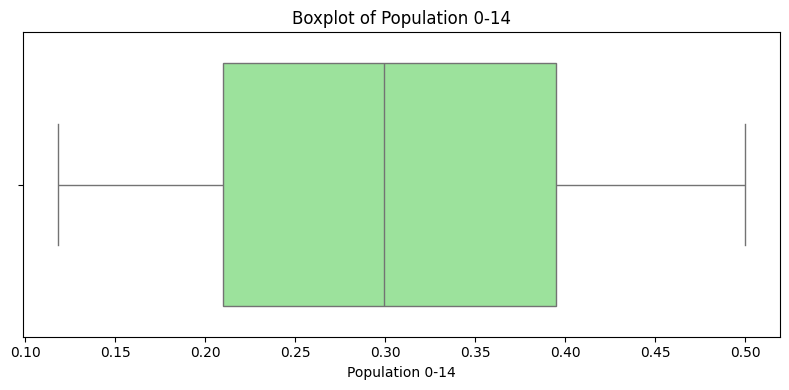

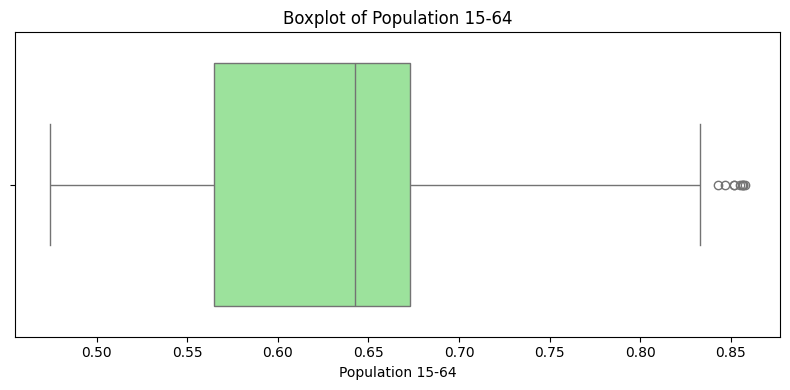

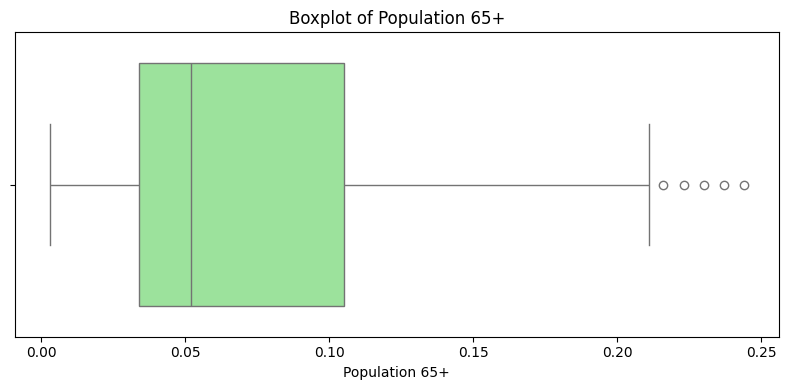

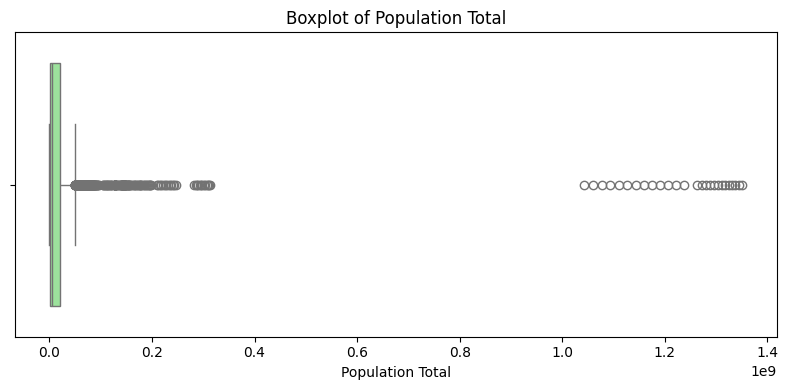

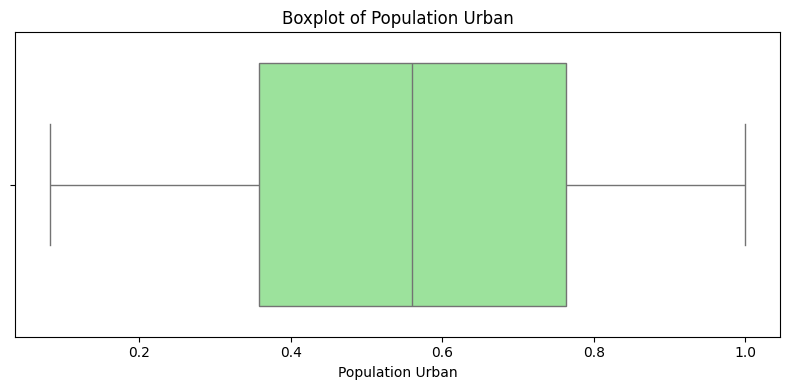

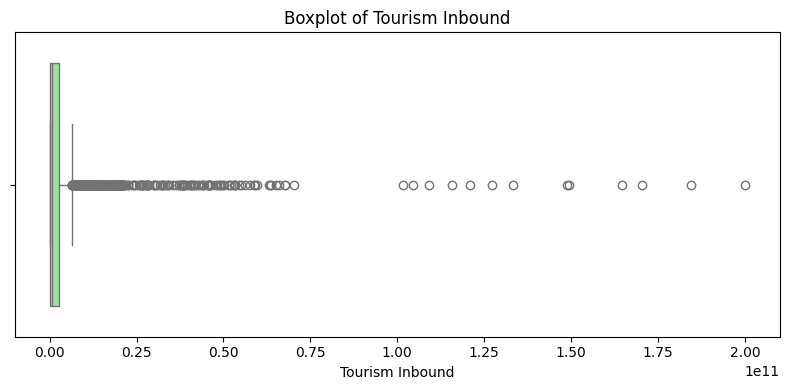

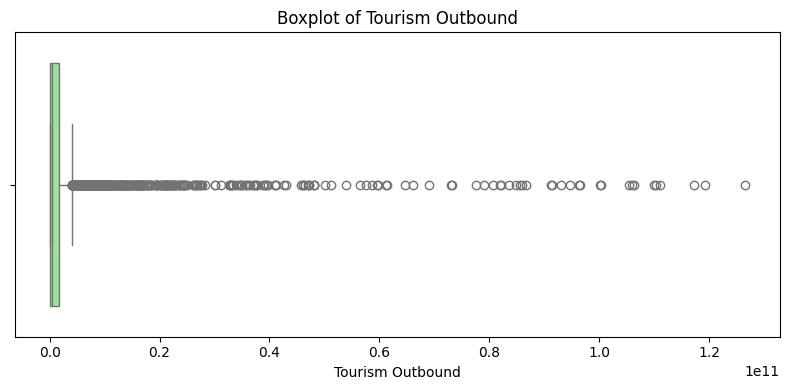

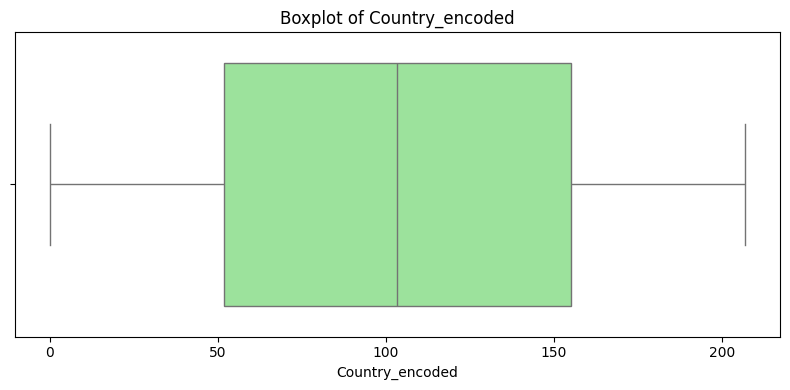

In [61]:
def plot_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color="lightgreen")
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()
plot_boxplots(df, num_cols)

**Feature Scaling**

In [62]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

In [63]:
# PCA for Dimensionality Reduction
pca = PCA()
data_pca = pca.fit_transform(X_scaled)


In [64]:
# The amount of variance that each PCA explains is
pca.explained_variance_

array([8.60511933e+00, 3.96156276e+00, 1.62685787e+00, 1.31903031e+00,
       1.08618976e+00, 9.58233279e-01, 8.98075800e-01, 8.28903794e-01,
       7.63625335e-01, 7.49186649e-01, 6.62594236e-01, 5.31902634e-01,
       4.56546126e-01, 4.34327961e-01, 2.96848566e-01, 2.39841704e-01,
       1.65706486e-01, 1.28464978e-01, 1.07047271e-01, 8.40254869e-02,
       5.08900840e-02, 3.83677174e-02, 1.54071729e-02, 1.23694894e-04])

In [65]:
# Cumulative variance

var = pca.explained_variance_ratio_

var = np.cumsum(np.round(var,decimals=4)*100)
var

array([ 35.84,  52.34,  59.12,  64.61,  69.13,  73.12,  76.86,  80.31,
        83.49,  86.61,  89.37,  91.59,  93.49,  95.3 ,  96.54,  97.54,
        98.23,  98.77,  99.22,  99.57,  99.78,  99.94, 100.  , 100.  ])

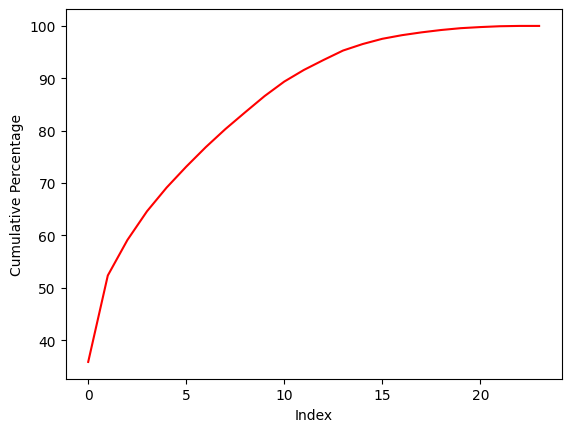

In [66]:
# Variance plot for PCA components obtained
plt.plot(var,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers. here, we are taking 15 columns because they are giving more than 95% data.

In [67]:
pc_components = pca.components_  # This gives you the principal components
df_pca = pc_components[:,:15]  # Select the first 15 principal components


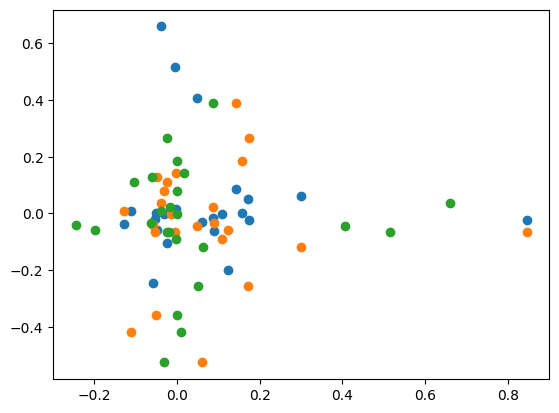

In [68]:
# Plot between PCA's

x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

**Model Fitting**

**Kmeans**

Using the elbow method to find the optimal number of clusters

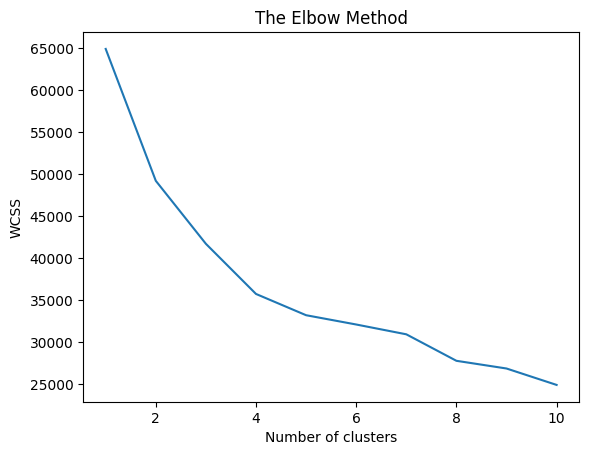

In [69]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we can see share drop after 3, so select 3 clusters

In [70]:
# Creating clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

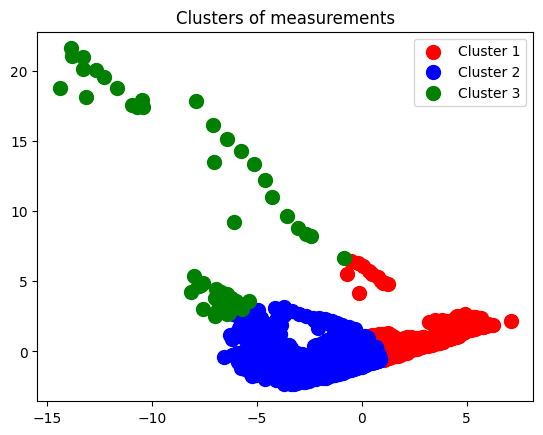

In [71]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

**Hierarchial**

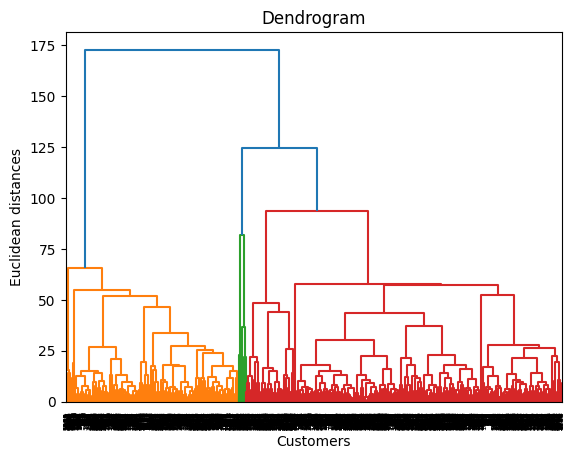

In [72]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [73]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(data_pca)

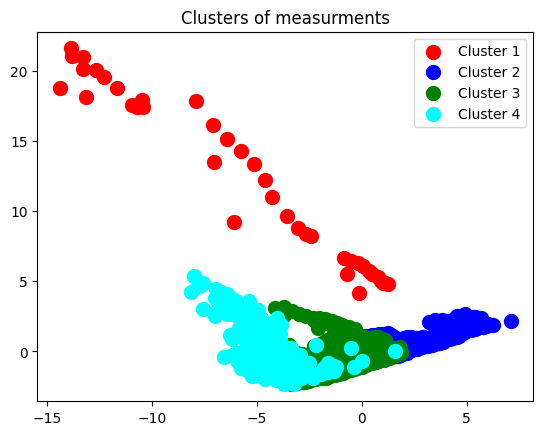

In [74]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

**DBSCAN**

In [75]:
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

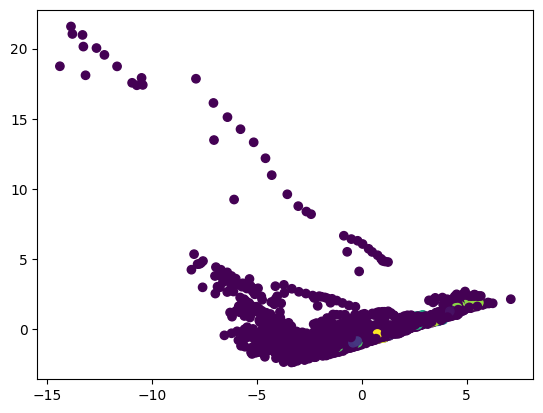

In [76]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.show()

In [77]:
df['cluster']=dbscan.labels_
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded,cluster
0,0.020,41.0,87931.0,26.0,94.0,26998.0,5.479006e+10,0.035,60.0,239.0,...,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0,20
1,0.050,41.0,9542.0,26.0,94.0,7499.0,9.129595e+09,0.034,22.0,239.0,...,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,5.0,-1
2,0.043,41.0,1617.0,26.0,94.0,1983.0,2.359122e+09,0.043,15.0,239.0,...,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,20.0,8
3,0.027,41.0,4276.0,26.0,94.0,1836.0,5.788312e+09,0.047,152.0,239.0,...,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,25.0,-1
4,0.046,41.0,1041.0,26.0,94.0,14338.0,2.610959e+09,0.051,12.0,239.0,...,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,29.0,27


**Model Evaluation**

In [78]:
# K-Means Clustering
optimal_k = 4  # Example, set based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(data_pca, kmeans_labels)

In [79]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_pca)

# Silhouette Score for Hierarchical
silhouette_hierarchical = silhouette_score(data_pca, hierarchical_labels)


In [80]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Silhouette Score for DBSCAN
try:
    silhouette_dbscan = silhouette_score(data_pca, dbscan_labels)
except ValueError:
    silhouette_dbscan = "Silhouette score could not be calculated for DBSCAN due to noise or single cluster."

In [81]:
# Print Silhouette Scores
print("Silhouette Scores:")
print(f"K-Means: {silhouette_kmeans}")
print(f"Hierarchical: {silhouette_hierarchical}")
print(f"DBSCAN: {silhouette_dbscan}")

Silhouette Scores:
K-Means: 0.23493857027397755
Hierarchical: 0.24867811128734182
DBSCAN: -0.36940222100003106


In [82]:
# Find the best method based on the highest Silhouette Score
best_method = max(silhouette_kmeans,silhouette_hierarchical,silhouette_dbscan if 'dbscan_sil_score' in locals() else float('-inf'))

# Print the best method based on Silhouette Score
if best_method ==silhouette_kmeans:
    selected_labels = KMeans_Cluster
    print("Best method: KMeans Clustering")
elif best_method == silhouette_hierarchical:
    print("Best method: Hierarchial Clustering")
else:
    print("Best method:DBSCAN ")

Best method: Hierarchial Clustering


**The below link is the app link**

https://clusteringglobaldevelopment-h2lfyoxbptcjad6m5ciwt6.streamlit.app/